In [206]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
%matplotlib inline
from pandas import DataFrame, Series
import pandas_datareader as pdr

  

import datetime as dt
import networkx as nx
    
    
    
import datetime as dt
import networkx as nx

plt.style.use('ggplot')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [162]:
data_file = pd.read_csv('February2018.csv', delimiter=',')


pd.set_option('display.max_rows', 76)  


data_file

,Device category,Key-values,Total impressions,Total Active View % viewable impressions,Ad server average eCPM ($),Ad server CTR
0,Desktop,cat=sex,5727718,0.5811,0.7101,0.0000
1,Desktop,divid=ad-category_350,58371,0.3769,1.0127,0.0000
2,Desktop,cat=love,7124343,0.6203,1.0115,0.0000
3,Desktop,cat=zodiac,107883,0.3774,0.6892,0.0000
4,Desktop,cat=self,4422599,0.6071,1.0498,0.0000
5,Desktop,cat=quotes,48719,0.4896,0.8030,0.0000
6,Desktop,cat=engaged,70,1.3125,0.2500,0.0000
7,Desktop,cat=men,6,0.0000,0.6475,0.0000
8,Desktop,cat=horoscope,20834,0.2867,1.3090,0.0000
9,Desktop,cat=buzz,5224957,0.6454,1.2307,0.0000


In [163]:
ecpm = data_file['Ad server average eCPM ($)']
kv = data_file['Key-values']
vimp = data_file['Total Active View % viewable impressions']
totimp = data_file['Total impressions']
ctr = data_file['Ad server CTR']
devcat = data_file['Device category']

In [164]:
one_ecpm = data_file.loc[ecpm < 1.00, ['Key-values', 'Ad server average eCPM ($)', 'Total impressions']]
one_two_ecpm = data_file.loc[(ecpm > 1.00) & (ecpm < 2.00), ['Key-values', 'Ad server average eCPM ($)', 'Total impressions']]
two_ecpm = data_file.loc[ecpm > 2.00, ['Key-values', 'Ad server average eCPM ($)', 'Total impressions']]



In [165]:
over2ecpm = data_file.loc[ecpm > 2.00, ['Ad server average eCPM ($)']]
under1ecpm = data_file.loc[ecpm < 1.00, ['Ad server average eCPM ($)']]
bet1and2ecpm = data_file.loc[(ecpm > 1.00) & (ecpm < 2.00), ['Ad server average eCPM ($)']]

under1kv= one_ecpm['Key-values']




#Ecpm Analysis

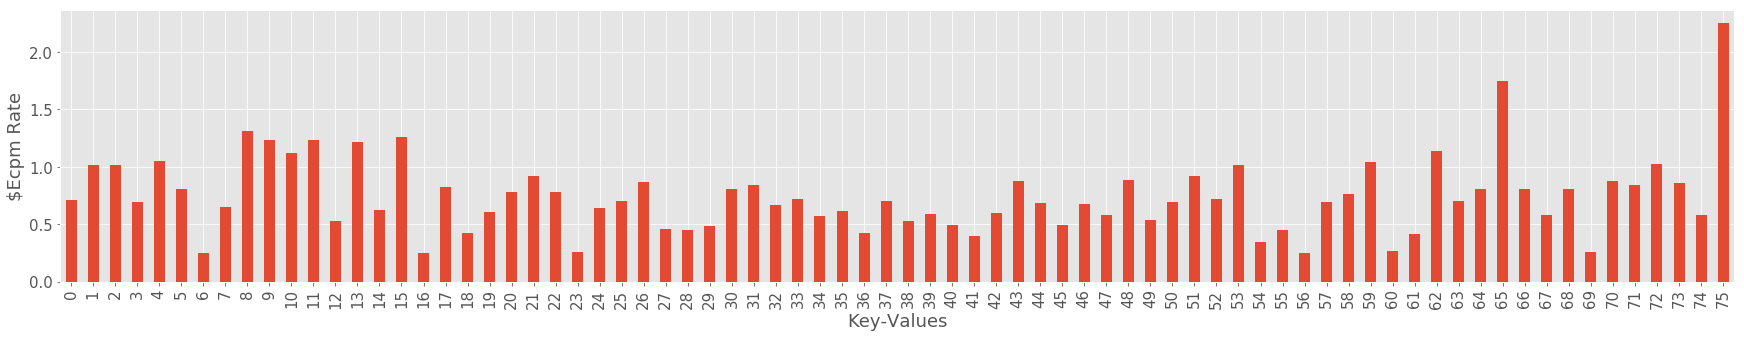

In [190]:
#Ecpm Bar Chart for all Accounts
x = kv
y = ecpm

plt.xlabel('Key-Values')
plt.ylabel('$Ecpm Rate')

ax = plt.axes()

plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar')

In [167]:
"""
61 accounts where the ecpm is less than $1.00
mean = $.62
standard deviation = .19
minimum = $.24
maximum = $.92 
"""


one_ecpm.describe()

,Ad server average eCPM ($),Total impressions
count,61.000000,6.100000e+01
mean,0.621816,3.103747e+06
std,0.190227,9.956053e+06
min,0.249200,6.000000e+00
25%,0.492300,2.310000e+02
50%,0.647500,3.459000e+03
75%,0.777900,1.078830e+05
max,0.922300,4.497380e+07


In [168]:
"""
14 accounts where the ecpm is $1.00-$2.00
mean = $1.17
standard deviation = .19
minimum = $1.01
maximum = $1.75 
"""

one_two_ecpm.describe()

,Ad server average eCPM ($),Total impressions
count,14.000000,1.400000e+01
mean,1.171686,1.375325e+06
std,0.195477,2.392531e+06
min,1.011500,5.500000e+01
25%,1.030675,8.257500e+02
50%,1.127600,6.957250e+04
75%,1.229900,1.414586e+06
max,1.745700,7.124343e+06


In [169]:
two_ecpm

,Key-values,Ad server average eCPM ($),Total impressions
75,cat=radical acceptance,2.2525,6


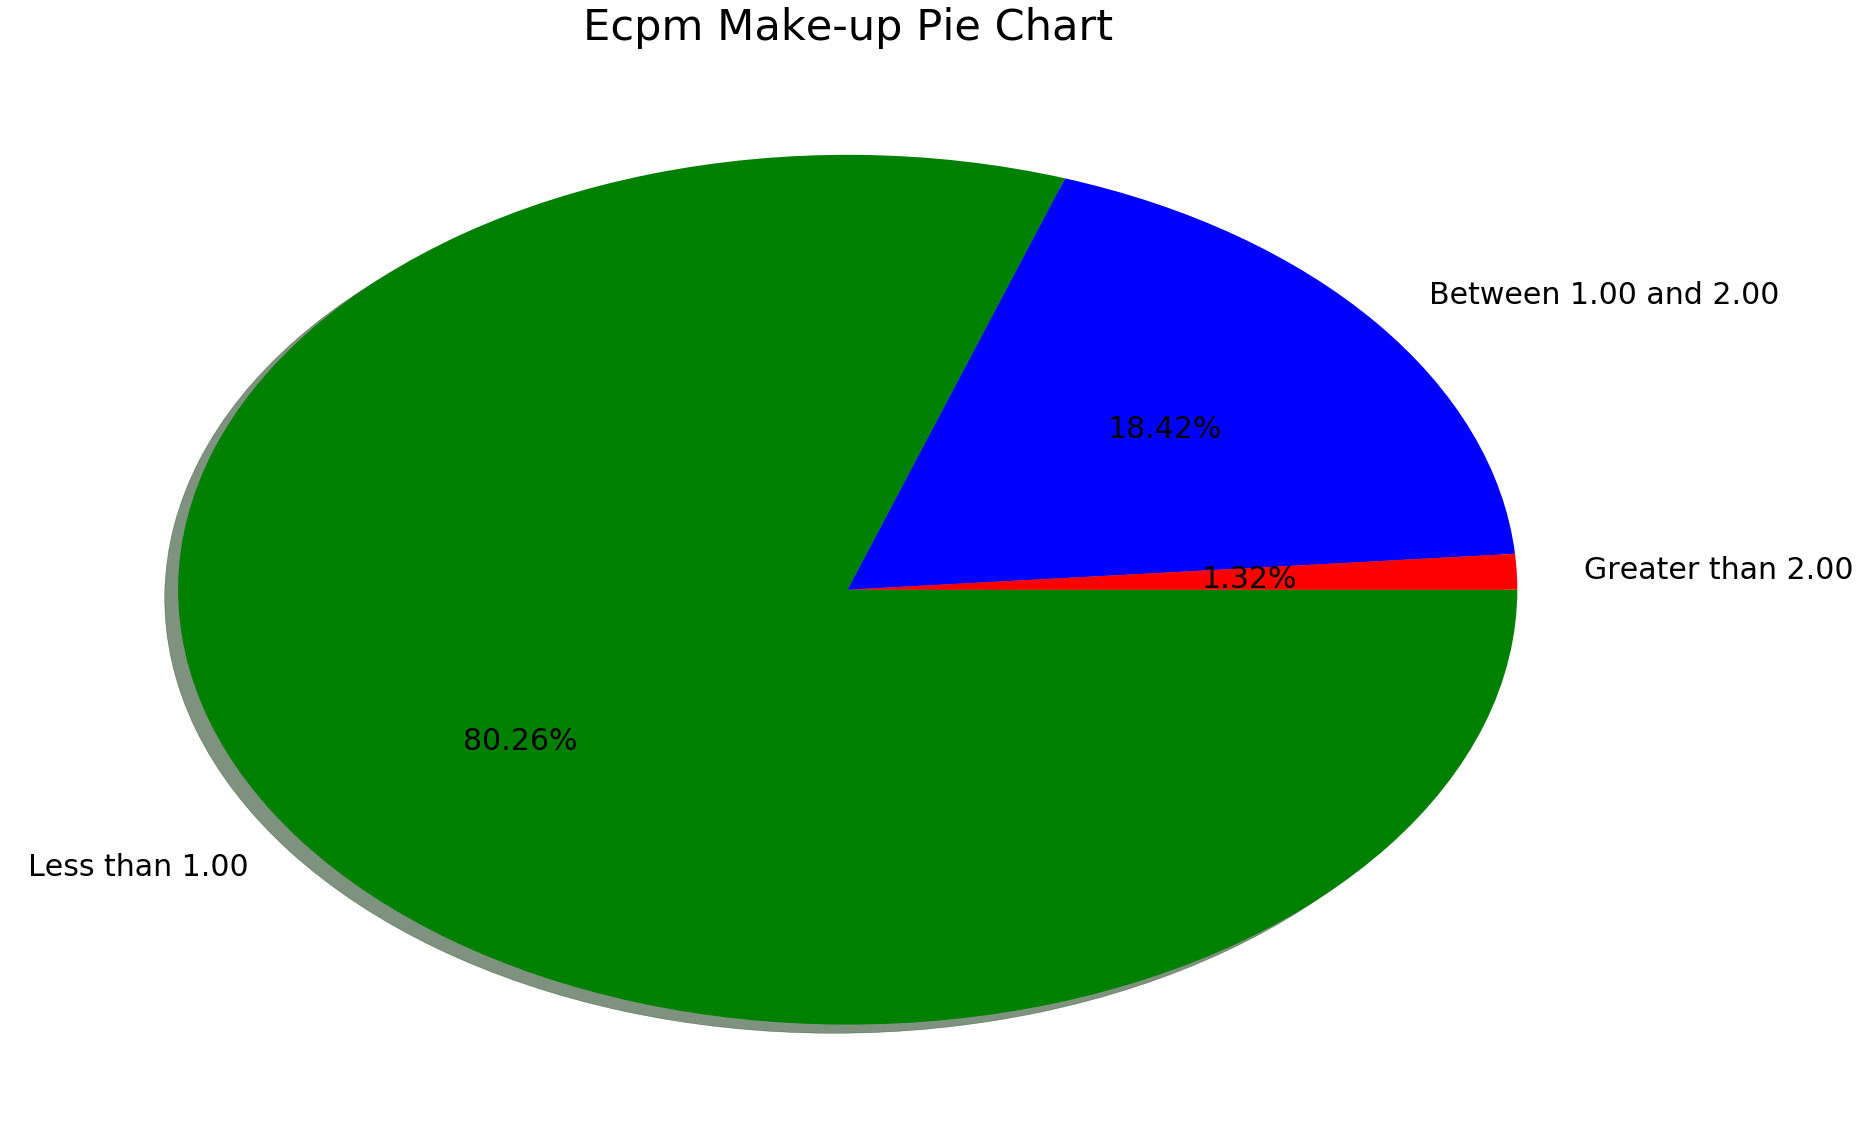

In [192]:
#Ecpm makeup chart
values = [61, 14, 1]
colors = ['green', 'blue', 'red']
labels = ['Less than 1.00', 'Between 1.00 and 2.00', 'Greater than 2.00']


plt.title('Ecpm Make-up Pie Chart')
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 30

plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%', counterclock=False, shadow=True)

plt.show()

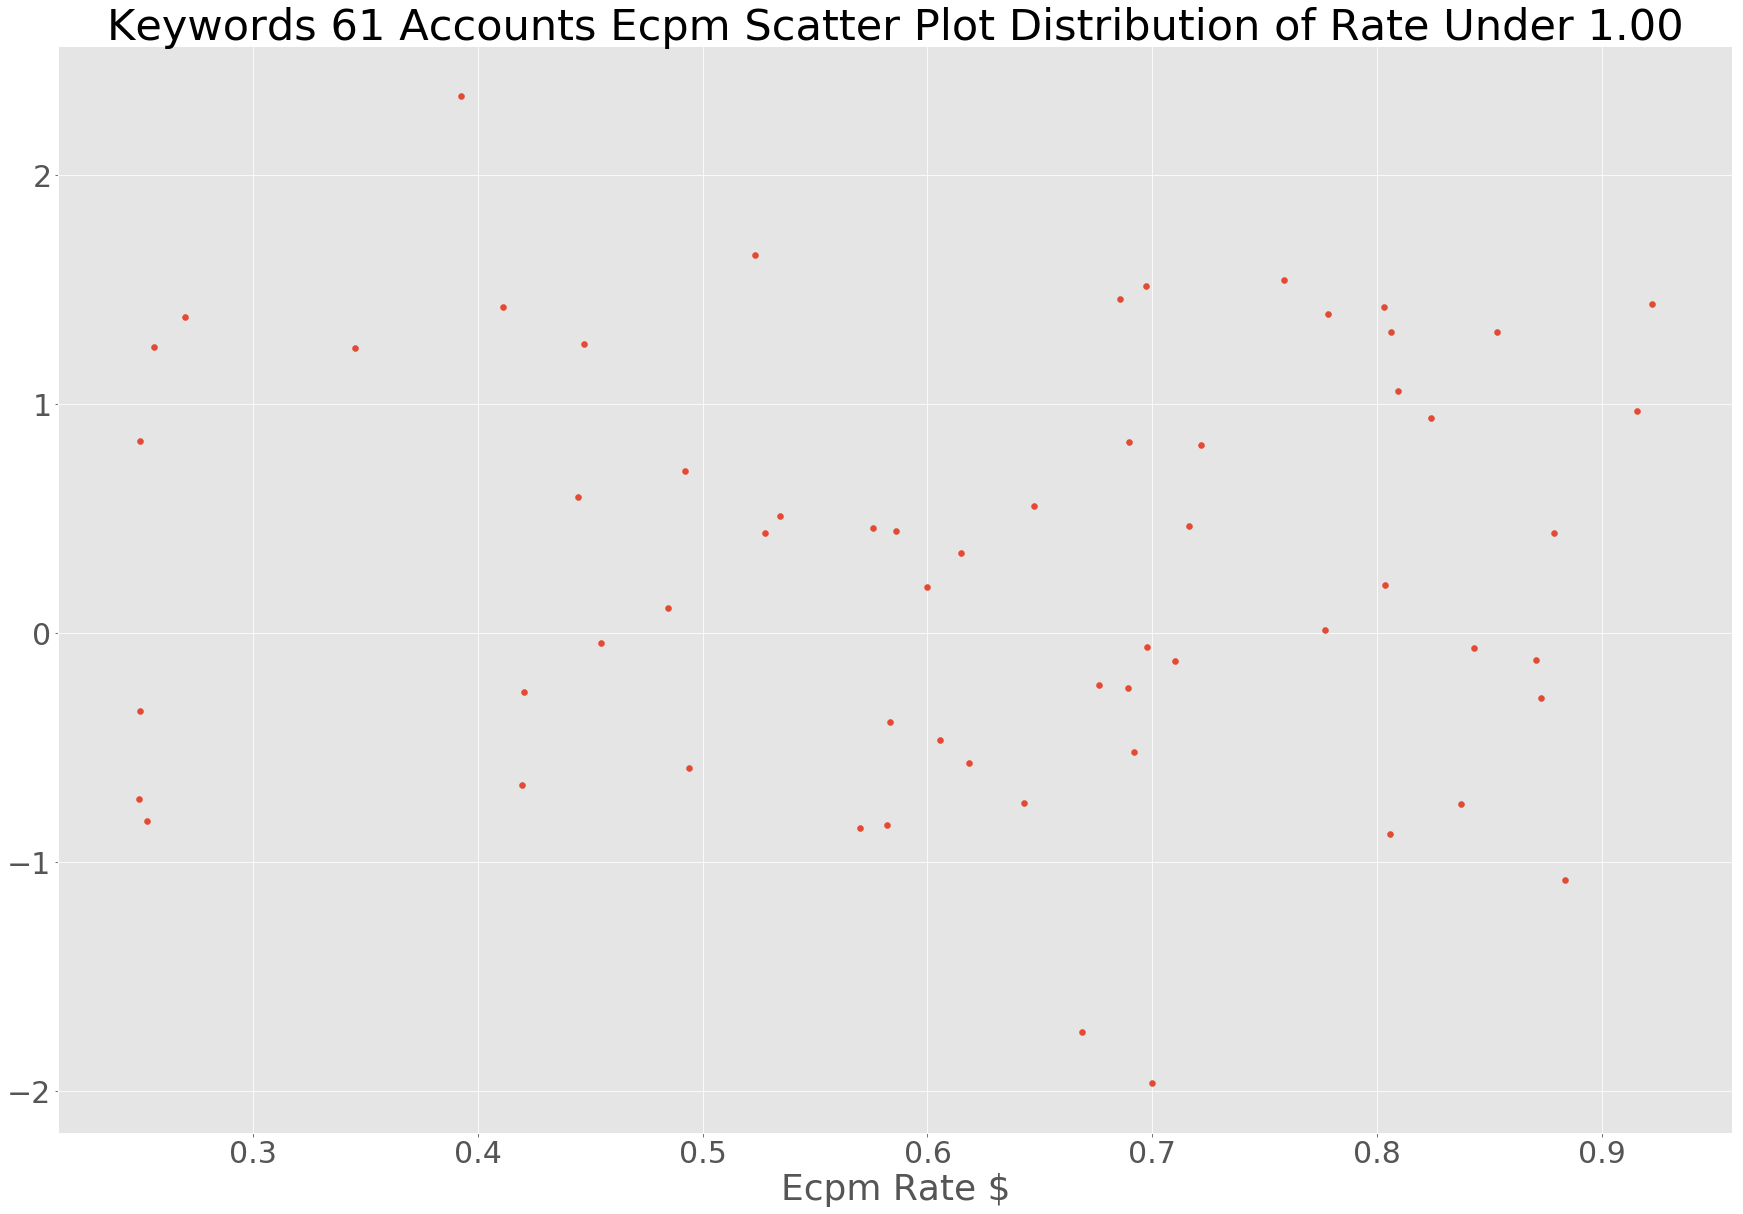

In [171]:
y = np.random.randn(61)

plt.scatter(under1ecpm, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('Keywords 61 Accounts Ecpm Scatter Plot Distribution of Rate Under 1.00')
plt.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (30,5)
plt.show()

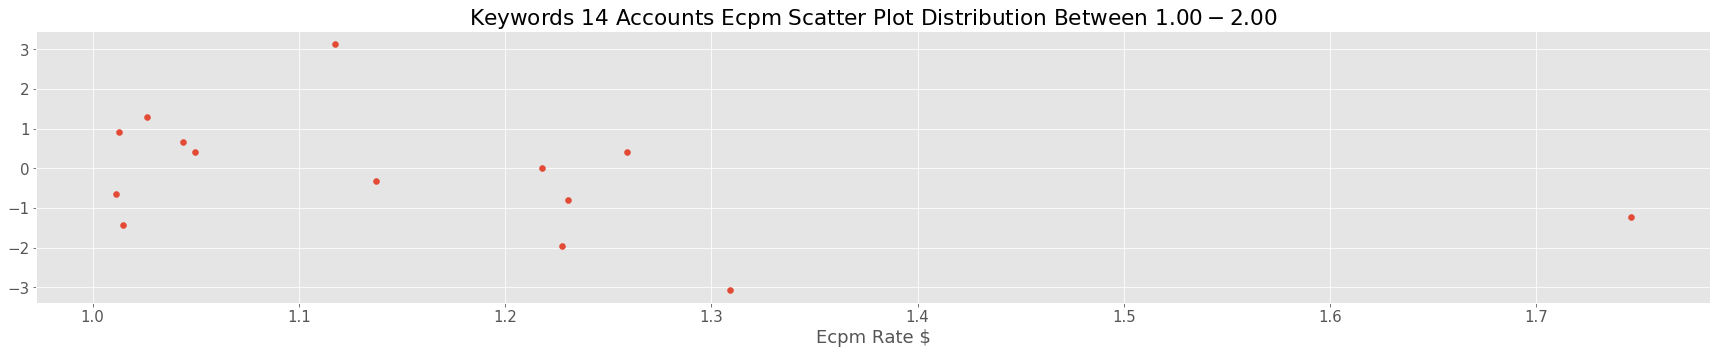

In [172]:
y = np.random.randn(14)

plt.scatter(bet1and2ecpm, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('Keywords 14 Accounts Ecpm Scatter Plot Distribution Between $1.00 - $2.00')
plt.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (30,5)
plt.show()

#Device Category Count

In [173]:
#Device Category counts
desktopcount = devcat.value_counts()["Desktop"]
smartphonecount = devcat.value_counts()["Smartphone"]
tabletcount = devcat.value_counts()["Tablet"]
tvcount = devcat.value_counts()["Connected TV"]

print("Desktop count:", desktopcount, ", " "Smartphone count:", smartphonecount,", " "Tablet count:", tabletcount, ", " "TV count:", tvcount)

Desktop count: 22 , Smartphone count: 22 , Tablet count: 20 , TV count: 12


Viewability Analysis

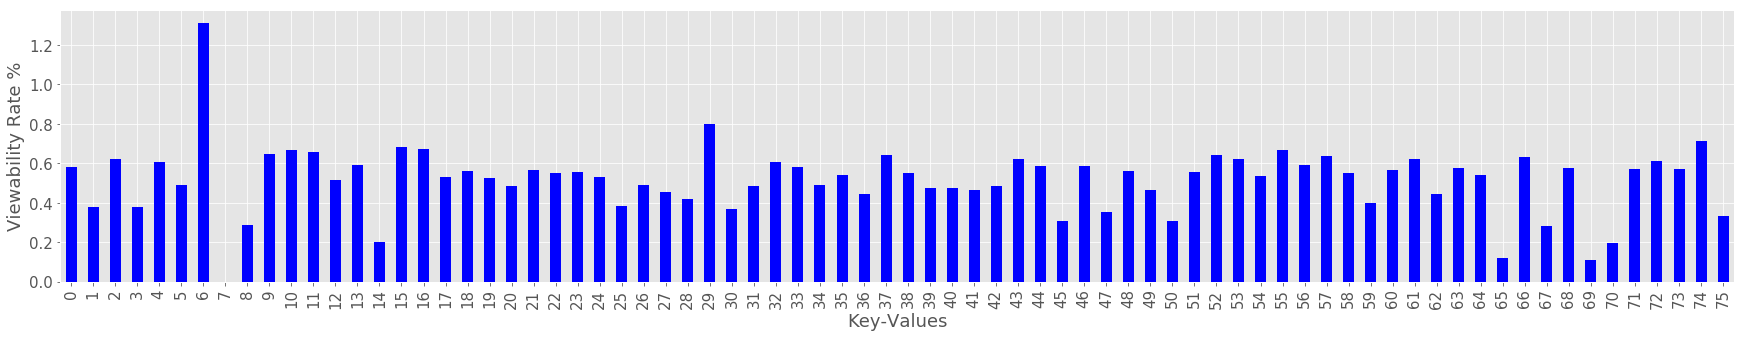

In [174]:
#Viewability Rate Bar Chart for all Accounts

x = kv
y = vimp

plt.xlabel('Key-Values')
plt.ylabel('Viewability Rate %')

ax = plt.axes()


plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'blue')

In [175]:
#Keywords Viewability of 45% or more

view45 = data_file.loc[vimp > .45, ['Key-values', 'Total Active View % viewable impressions']]


view45

,Key-values,Total Active View % viewable impressions
0,cat=sex,0.5811
2,cat=love,0.6203
4,cat=self,0.6071
5,cat=quotes,0.4896
6,cat=engaged,1.3125
9,cat=buzz,0.6454
10,cat=heartbreak,0.6664
11,cat=family,0.6593
12,cat=couplehood,0.5152
13,cat=celebrity,0.5922


Impressions Analysis

In [176]:
#---------------------------impressions objects
impunder1000 = data_file.loc[totimp < 1000, ['Total impressions']]
impkvunder1000 = data_file.loc[totimp < 1000, ['Key-values']]

imp1000 = data_file.loc[(totimp > 1000) & (totimp < 10000), ['Total impressions']]
impkv1000 = data_file.loc[(totimp > 1000) & (totimp < 10000), ['Key-values']]

imp10000 = data_file.loc[(totimp > 10000) & (totimp < 100000), ['Total impressions']]
impkv10000 = data_file.loc[(totimp > 10000) & (totimp < 100000), ['Key-values']]

imp100000 = data_file.loc[(totimp > 100000) & (totimp < 1000000), ['Total impressions']]
impkv100000 = data_file.loc[(totimp > 100000) & (totimp < 1000000), ['Key-values']]

imp1000000 = data_file.loc[(totimp > 1000000) & (totimp < 10000000), ['Total impressions']]
impkv100000 = data_file.loc[(totimp > 1000000) & (totimp < 10000000), ['Key-values']]

In [177]:
#finding out the total impressions of all keywords. Each next value is the added value with the previous value
total2 = 0

for i in range(len(totimp)):
    total2 += totimp[i]
    
   
    print(total2)

5727718
5786089
12910432
13018315
17440914
17489633
17489703
17489709
17510543
22735500
24493487
24877870
24879952
24880461
24880474
24961248
24961447
24962619
24962771
24963462
24963951
24966826
57998595
57998669
102972473
103320825
139459817
139555358
139555980
139555995
139754480
184068486
192466013
193692707
193696166
193696934
193697030
193941132
193944052
193950313
193951867
193957245
193959620
193963137
197402334
197412393
200573902
200619272
203874001
203882176
203897400
207557634
208344177
208521517
208522086
208522208
208522230
208542851
208542944
208543488
208543542
208544053
208544241
208544985
208560984
208561039
208567759
208567889
208574449
208574491
208575047
208581101
208582772
208583003
208583114
208583120


In [178]:
#percentage of each ad out of the total ads

dimp2_total = float(208583120)

for i in range(len(totimp)):
    percent_total = (totimp[i] / dimp2_total) *100
    
    
    print(format(percent_total,'.4f'),'%', ' = ',kv[i])

2.7460 %  =  cat=sex
0.0280 %  =  divid=ad-category_350
3.4156 %  =  cat=love
0.0517 %  =  cat=zodiac
2.1203 %  =  cat=self
0.0234 %  =  cat=quotes
0.0000 %  =  cat=engaged
0.0000 %  =  cat=men
0.0100 %  =  cat=horoscope
2.5050 %  =  cat=buzz
0.8428 %  =  cat=heartbreak
0.1843 %  =  cat=family
0.0010 %  =  cat=couplehood
0.0002 %  =  cat=celebrity
0.0000 %  =  cat=lifestyle
0.0387 %  =  cat=dating
0.0001 %  =  cat=complicated
0.0006 %  =  cat=love quotes
0.0001 %  =  cat=taken
0.0003 %  =  cat=single
0.0002 %  =  cat=married
0.0014 %  =  cat=radical acceptance
15.8363 %  =  cat=sex
0.0000 %  =  divid=ad-category_350
21.5616 %  =  cat=love
0.1670 %  =  cat=zodiac
17.3259 %  =  cat=self
0.0458 %  =  cat=quotes
0.0003 %  =  cat=engaged
0.0000 %  =  cat=men
0.0952 %  =  cat=horoscope
21.2453 %  =  cat=buzz
4.0260 %  =  cat=heartbreak
0.5881 %  =  cat=family
0.0017 %  =  cat=couplehood
0.0004 %  =  cat=celebrity
0.0000 %  =  cat=lifestyle
0.1170 %  =  cat=dating
0.0014 %  =  cat=complicated

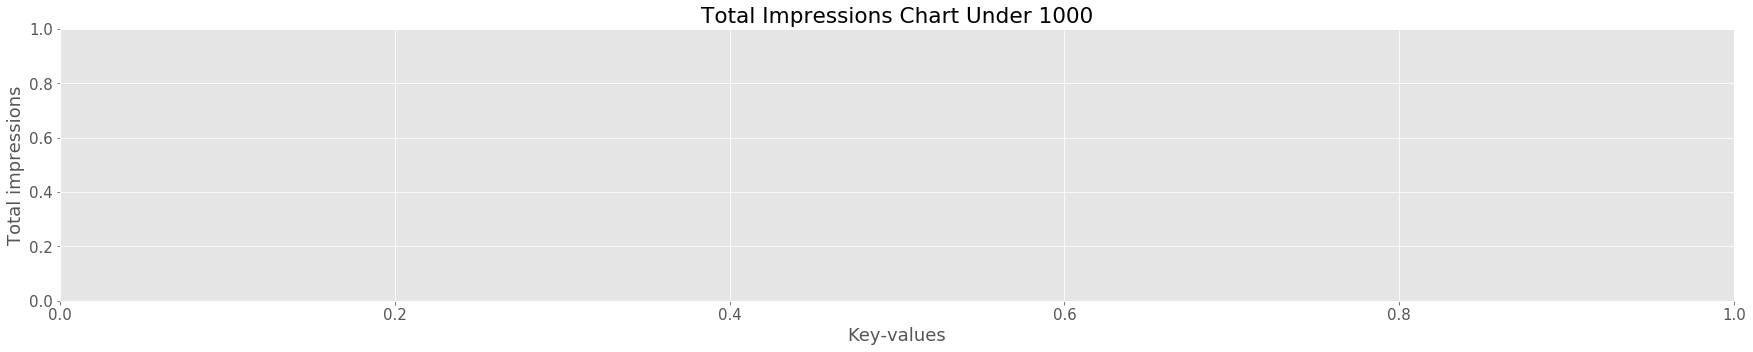

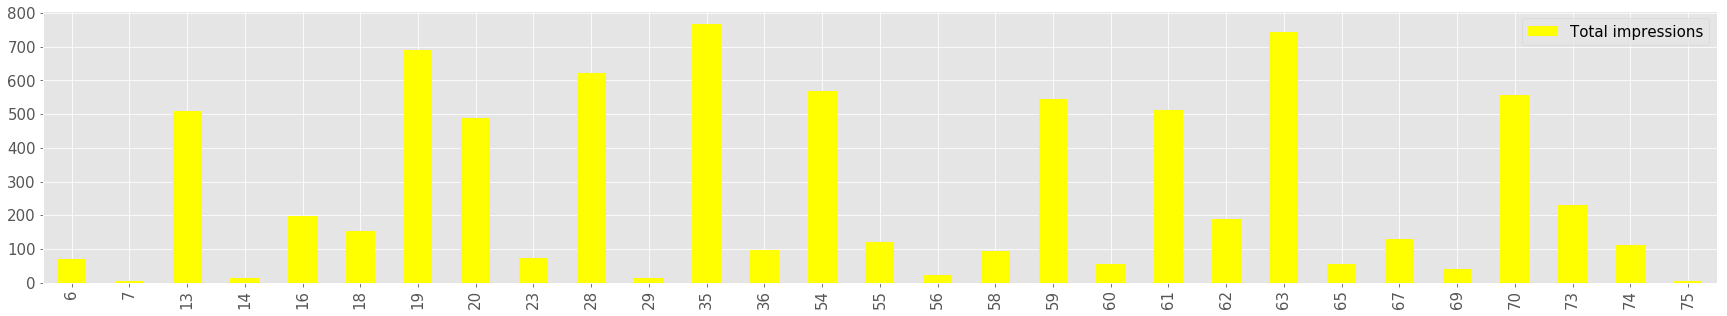

In [179]:
#Impressions under 1000

x = impkvunder1000
y = impunder1000


ax = plt.axes()

plt.xlabel('Key-values')
plt.ylabel('Total impressions')
plt.title('Total Impressions Chart Under 1000')

plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'yellow')

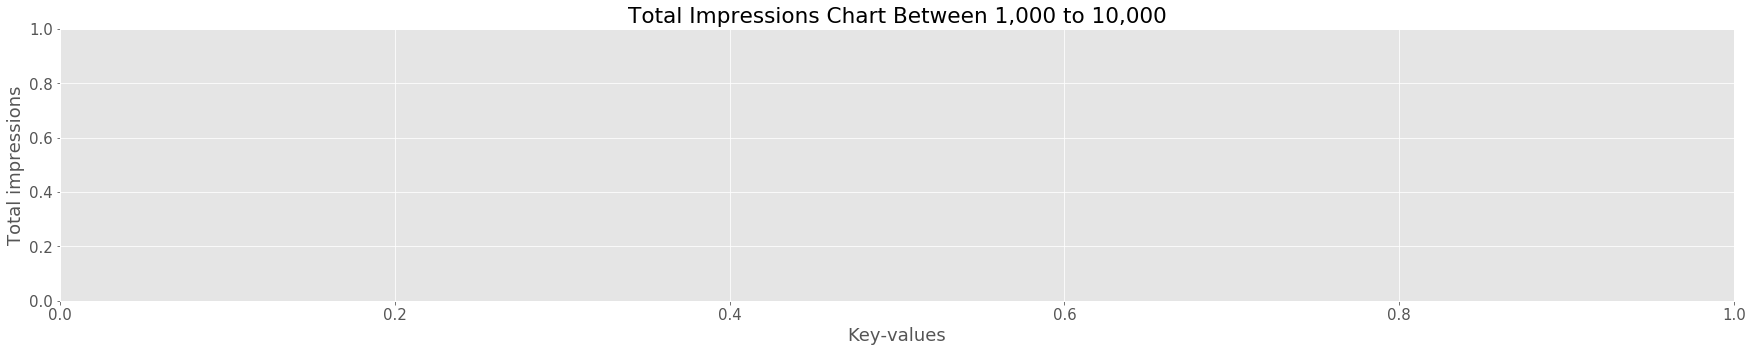

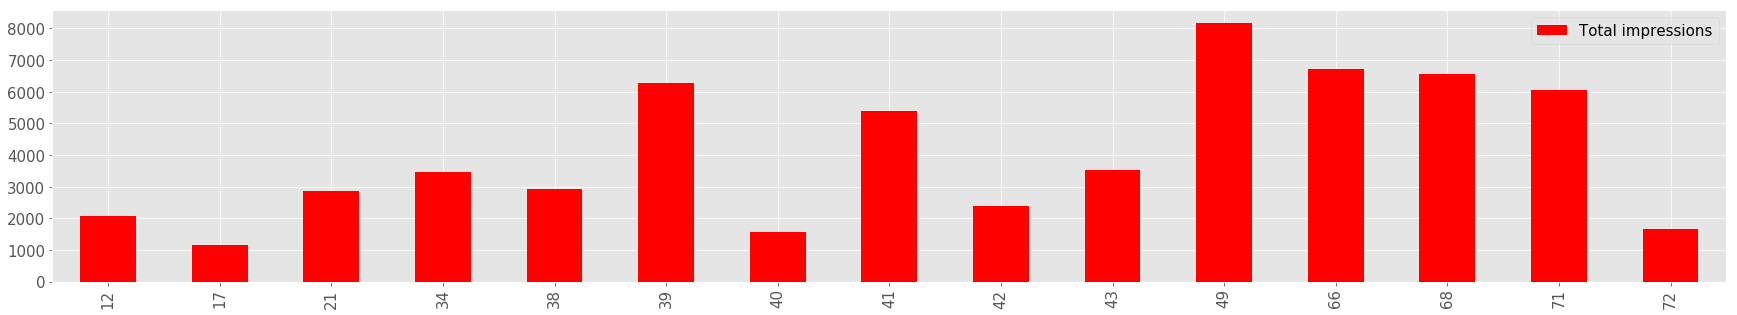

In [180]:
#Impressions between 1000 and 10000

x = impkvunder1000
y = imp1000


ax = plt.axes()

plt.xlabel('Key-values')
plt.ylabel('Total impressions')
plt.title('Total Impressions Chart Between 1,000 to 10,000')

plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'red')

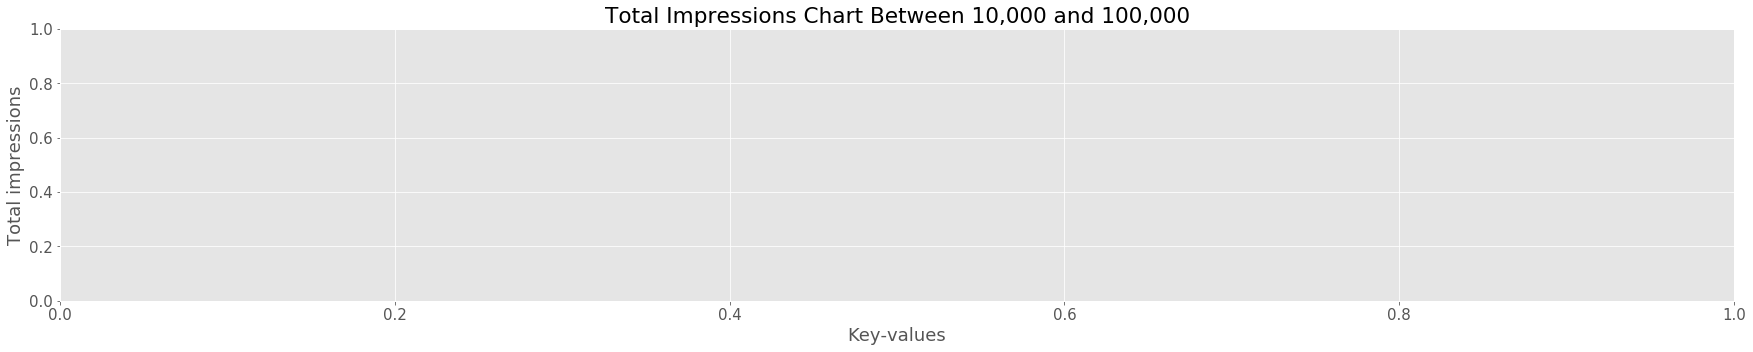

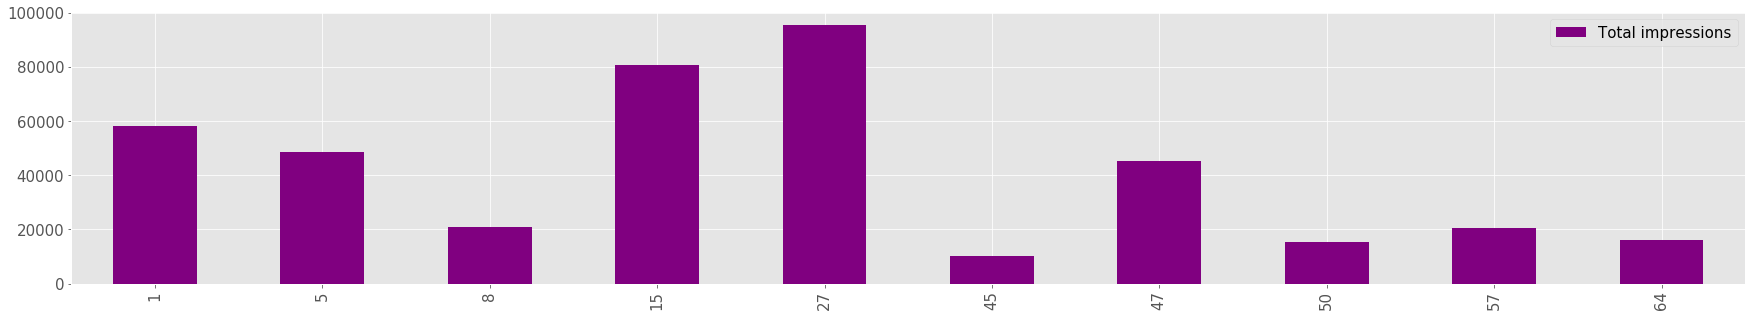

In [181]:
#Impressions between 10000 and 100000

x = impkv10000
y = imp10000

ax = plt.axes()

plt.xlabel('Key-values')
plt.ylabel('Total impressions')
plt.title('Total Impressions Chart Between 10,000 and 100,000')

plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'purple')

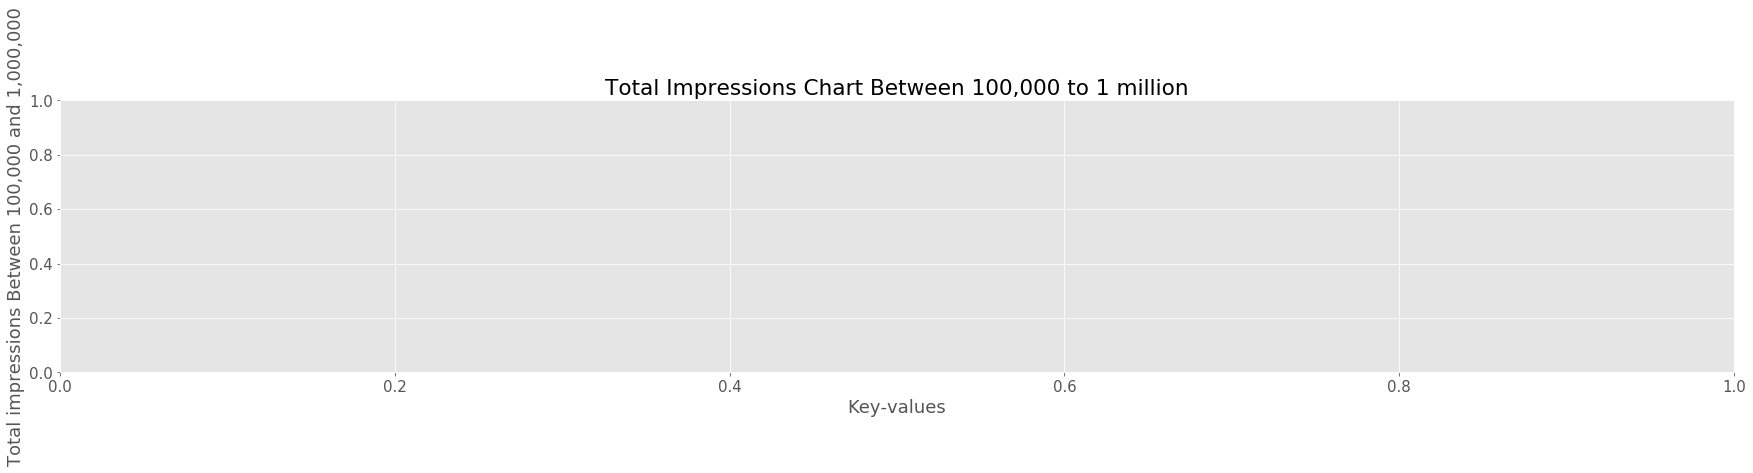

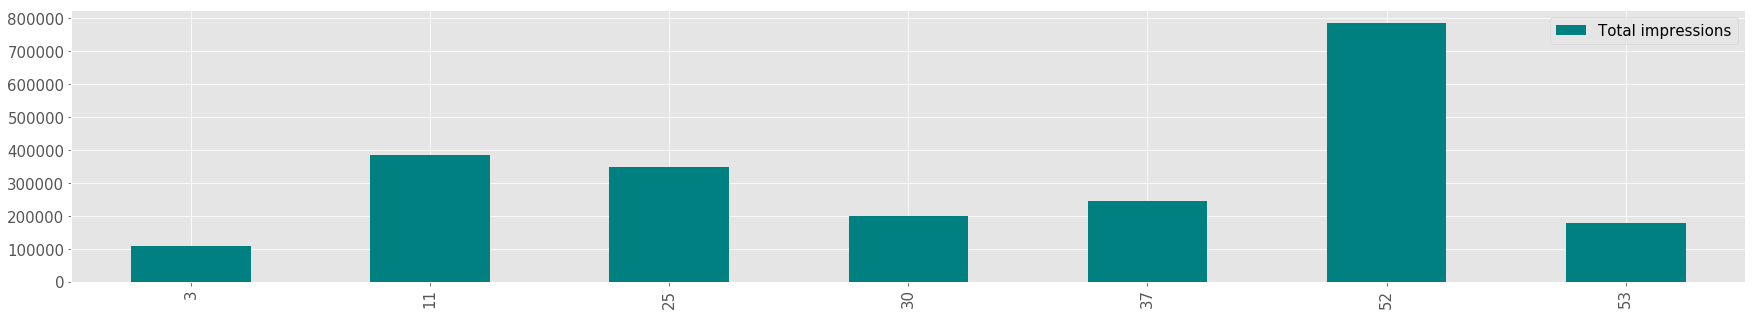

In [182]:
#Imps between 100,000 and 1,000000

x = impkv100000
y = imp100000

plt.xlabel('Key-values')
plt.ylabel('Total impressions Between 100,000 and 1,000,000')
plt.title('Total Impressions Chart Between 100,000 to 1 million')

ax = plt.axes()


plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'teal')

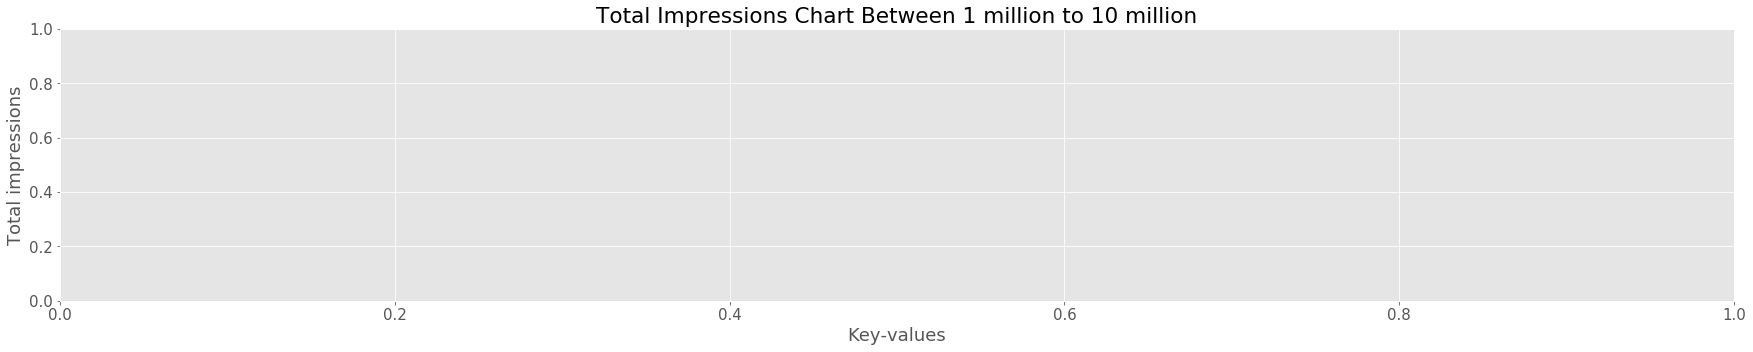

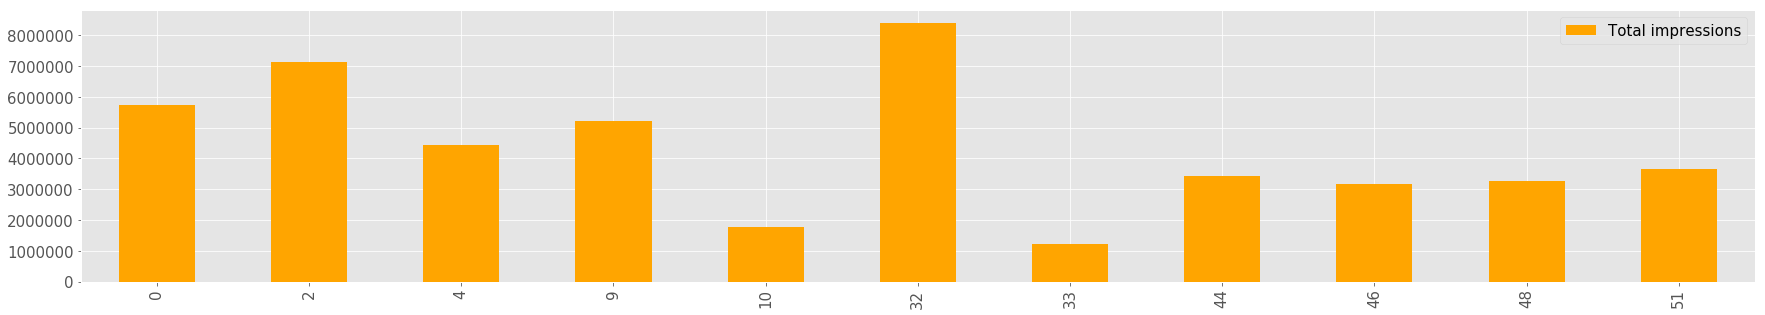

In [183]:
#Imps between 1,000,000 and 10,000,000

x = impkv100000
y = imp1000000

plt.xlabel('Key-values')
plt.ylabel('Total impressions')
plt.title('Total Impressions Chart Between 1 million to 10 million')

ax = plt.axes()


plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar', color = 'orange')

Impressions vs Ecpm

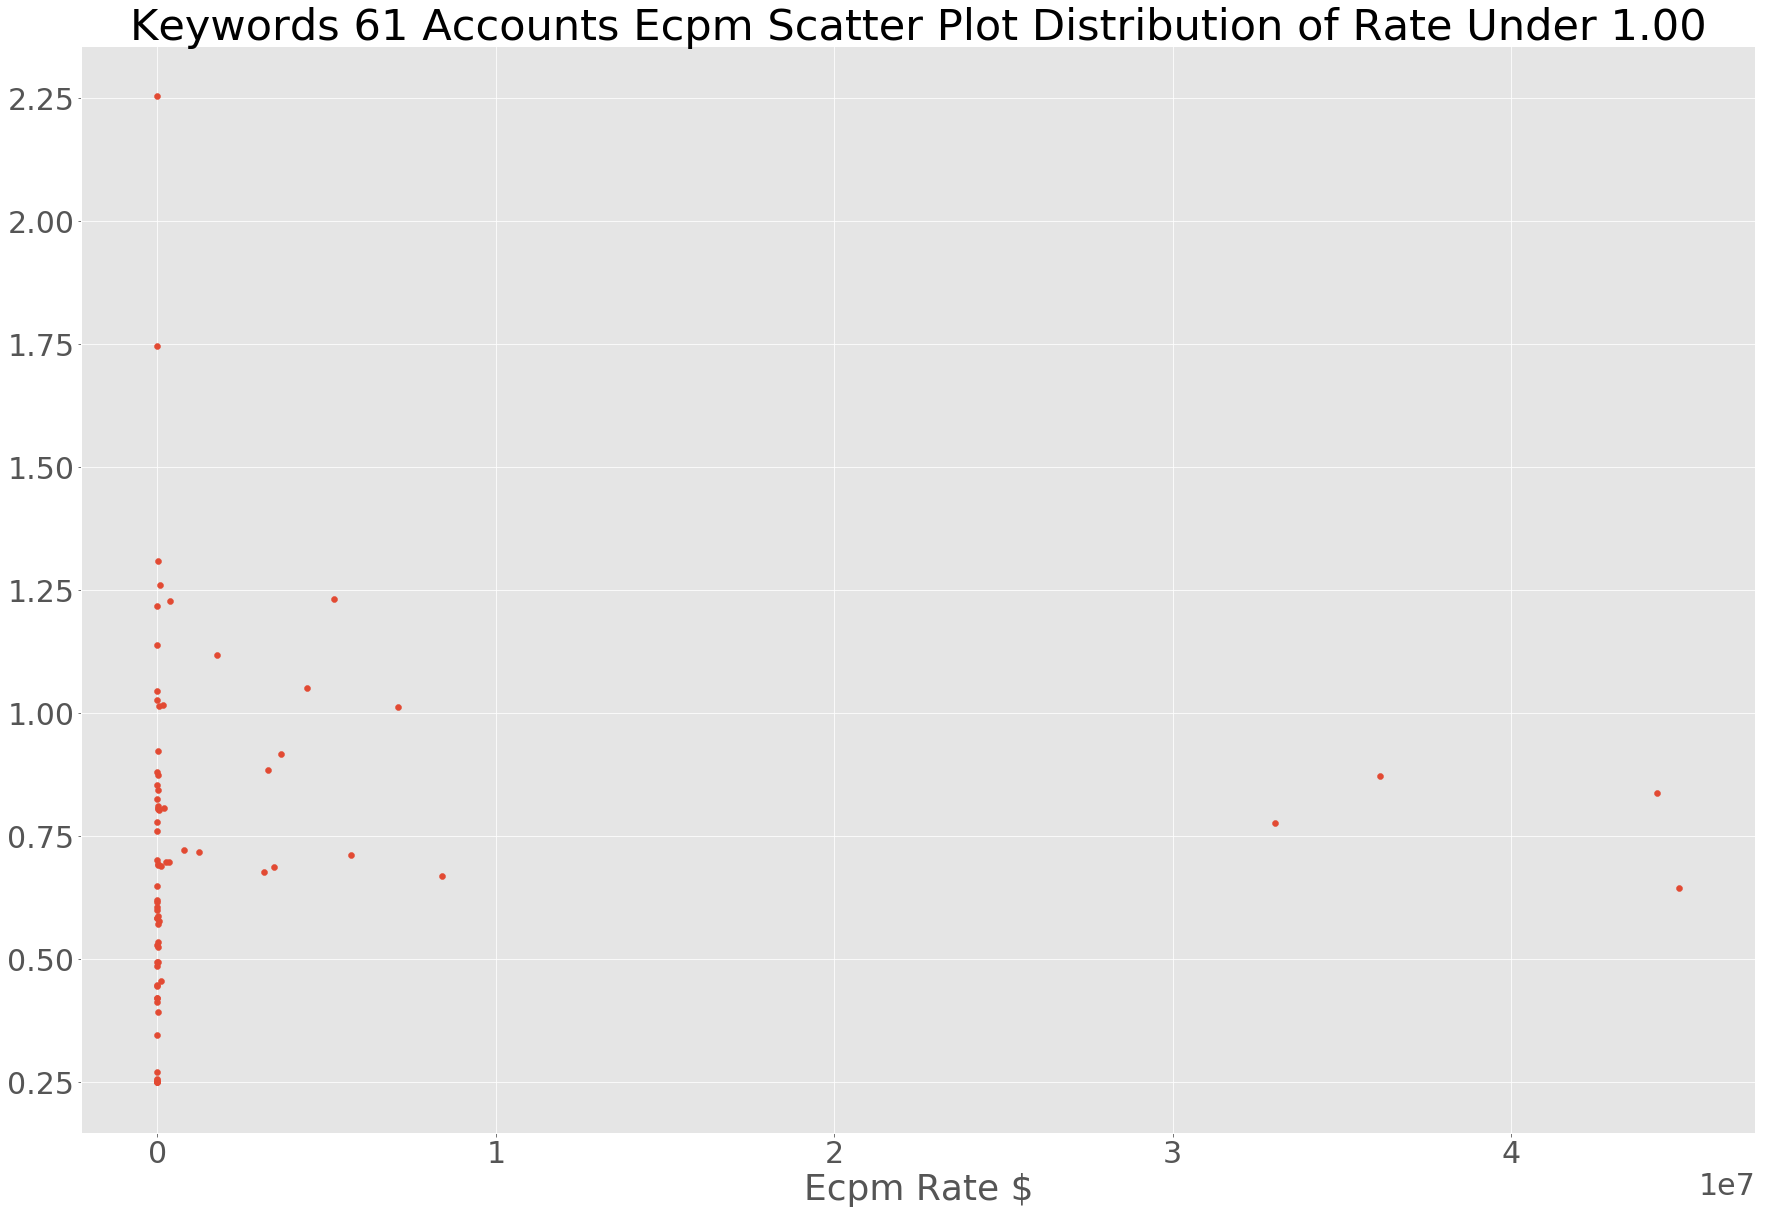

In [193]:
"""
Work in Progress:
"""

y = np.random.randn(61)

plt.scatter(totimp, ecpm)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('Keywords 61 Accounts Ecpm Scatter Plot Distribution of Rate Under 1.00')
plt.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (30,5)
plt.show()